
# 🔍 Logistic Regression Project – Predicting Binary Outcome

In this notebook, we'll use **Logistic Regression** to predict whether a person purchased a product or not based on their Age and Estimated Salary.

---


In [19]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:

# Load Dataset
df = pd.read_csv("Social_Network_Ads (2).csv")  # Ensure your CSV file is in the same directory
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:

# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:

# Check Missing Values
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

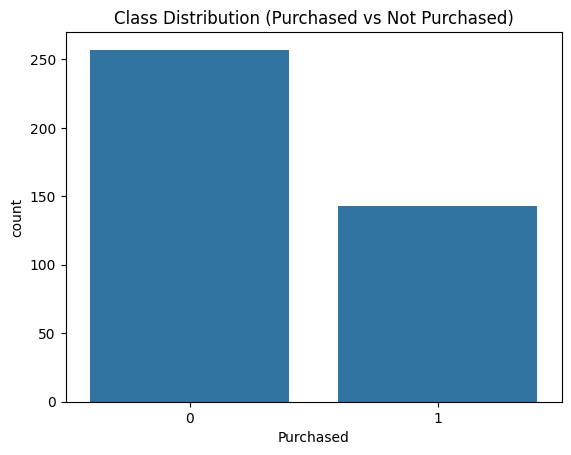

In [23]:

# 📊 EDA - Visualize Class Balance
sns.countplot(x='Purchased', data=df)
plt.title("Class Distribution (Purchased vs Not Purchased)")
plt.show()


In [24]:

# Data Preprocessing
# Drop User ID and Gender (if present)
df = df.drop(['User ID', 'Gender'], axis=1, errors='ignore')


In [25]:

# Feature Scaling (optional but improves performance for Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['Age', 'EstimatedSalary']])
y = df['Purchased']


In [26]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [28]:

# Predictions & Evaluation
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8625

 Confusion Matrix:
 [[50  2]
 [ 9 19]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



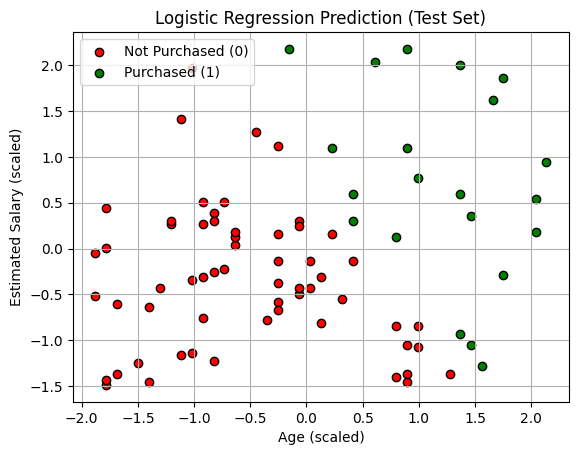

In [29]:
# Predict test labels
y_pred = model.predict(X_test)

# Plot points with color-coded predictions
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1],
            color='red', label='Not Purchased (0)', edgecolors='k')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1],
            color='green', label='Purchased (1)', edgecolors='k')

plt.title("Logistic Regression Prediction (Test Set)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend()
plt.grid(True)
plt.show()



## ✅ Conclusion

- Logistic Regression is useful for binary classification problems.
- Accuracy score and confusion matrix help us evaluate the performance.
- Scaling improves model performance.
- You can further try adding more features, use GridSearchCV, or try other classifiers like KNN, Decision Tree, etc.

---
